In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [94]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
num_steps = 5000
batch_size = 128

display_step = 1000
examples_to_show = 30

num_hidden_1 = 256 
num_hidden_2 = 128 
num_input = 784 


# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

# for dropout
dr = tf.placeholder("float")


weights = {
    'encoder_h1': tf.Variable(tf.truncated_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.truncated_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.truncated_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.truncated_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.truncated_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.truncated_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.truncated_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.truncated_normal([num_input])),
}

In [0]:
# ENCODER
layer_1_ec = tf.nn.sigmoid(tf.add(tf.matmul(X, weights['encoder_h1']), biases['encoder_b1']))
layer_1_dr_ec = tf.nn.dropout(layer_1_ec, dr)
    
layer_2_ec = tf.nn.sigmoid(tf.add(tf.matmul(layer_1_dr_ec, weights['encoder_h2']), biases['encoder_b2']))
layer_2_dr_ec = tf.nn.dropout(layer_2_ec, dr)
    
# DECODER
layer_1_dc = tf.nn.sigmoid(tf.add(tf.matmul(layer_2_dr_ec, weights['decoder_h1']), biases['decoder_b1']))
layer_1_dr_dc = tf.nn.dropout(layer_1_dc, dr)
        
layer_2_dc = tf.nn.sigmoid(tf.add(tf.matmul(layer_1_dr_dc, weights['decoder_h2']), biases['decoder_b2']))
layer_2_dr_dc = tf.nn.dropout(layer_2_dc, dr)

# PREDICTIONS
y_pred = layer_2_dr_dc
y_true = X

loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(0.01).minimize(loss)

init = tf.global_variables_initializer()

In [106]:
sess = tf.Session()
sess.run(init)

losses = []
for i in range(1, num_steps+1):

    batch_x, _ = mnist.train.next_batch(batch_size)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x, dr: 0.8})
    losses.append(l)
    
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))
    
# STORING THE OUTPUTS FROM EACH LAYER
l1_ec, l2_ec, l1_dc, l2_dc= sess.run([layer_1_dr_ec, layer_2_dr_ec, layer_1_dr_dc, layer_2_dr_dc], feed_dict={X: mnist.test.images[0:1000], dr: 0.8})

Step 1: Minibatch Loss: 0.539415
Step 1000: Minibatch Loss: 0.094243
Step 2000: Minibatch Loss: 0.066194
Step 3000: Minibatch Loss: 0.053546
Step 4000: Minibatch Loss: 0.048811
Step 5000: Minibatch Loss: 0.049072


Original Images


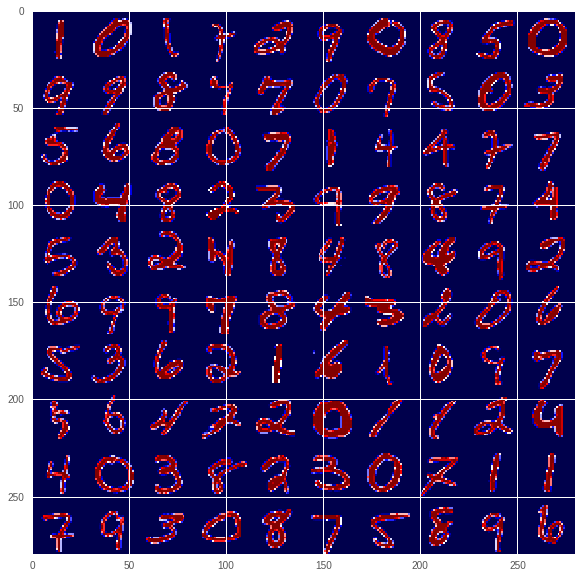

Reconstructed Images


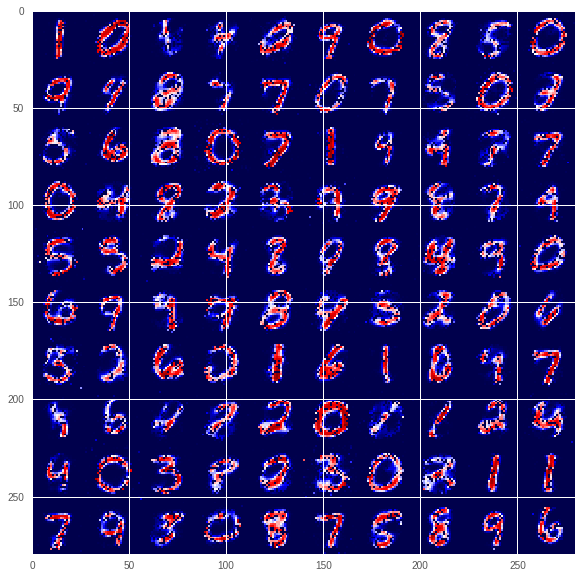

In [108]:
n = 10
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))


for i in range(n):
    batch_x, _ = mnist.test.next_batch(n)
    g = sess.run(layer_2_dr_dc, feed_dict={X: batch_x, dr: 0.8})
    
    for j in range(n):
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
        
    for j in range(n):
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="seismic")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="seismic")
plt.show()

In [0]:
# MY HELPER FUNCTION TO GENRATE THE PLOTS

from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

inputs_test_images = mnist.test.images[:1000]
outputs_test_labels = np.argmax(np.array(mnist.test.labels[:1000]), axis = 1)

digits = datasets.load_digits(n_class=6)
X = inputs_test_images
y = outputs_test_labels
n_samples, n_features = X.shape
n_neighbors = 30

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    
    mean = []
    for i in range(0, 10):
        mean.append(X[np.where(outputs_test_labels == i)].mean(axis=0))

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]), color=plt.cm.Set1(y[i] / 10.), fontdict={'weight': 'bold', 'size': 9})
    
    for i in range(0, 10):
        plt.annotate(''+str(i), xy=(mean[i][0], mean[i][1]), xytext=(mean[i][0], mean[i][1]), fontsize = 20)
        
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing t-SNE embedding
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.006s...
[t-SNE] Computed neighbors for 1000 samples in 0.516s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.233275
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.752953
[t-SNE] Error after 1000 iterations: 1.335870


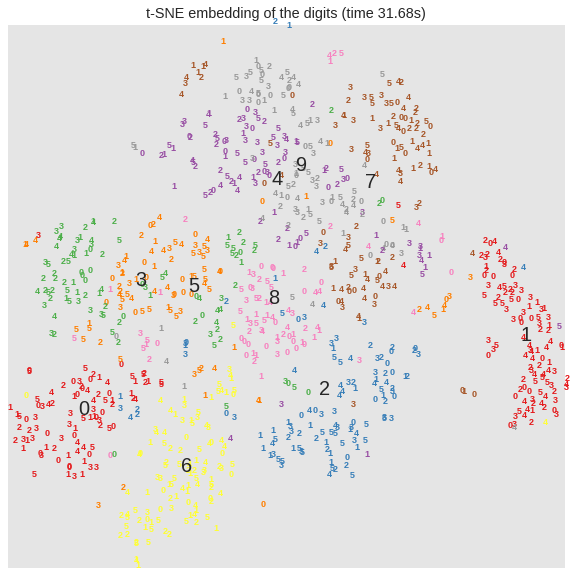

In [110]:
from time import time
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, verbose= 1, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(np.array(l1_ec))


plot_embedding(X_tsne, "t-SNE embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()

Computing t-SNE embedding
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.015s...
[t-SNE] Computed neighbors for 1000 samples in 1.513s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.751339
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.617165
[t-SNE] Error after 1000 iterations: 1.292469


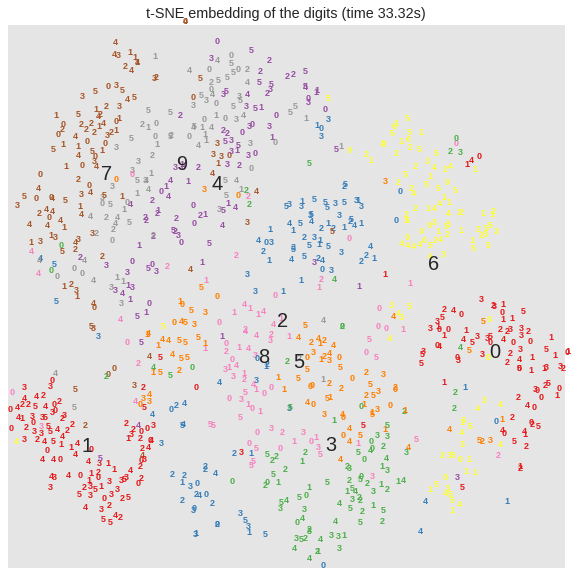

In [111]:
from time import time
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, verbose= 1, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(np.array(l2_dc))


plot_embedding(X_tsne, "t-SNE embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()

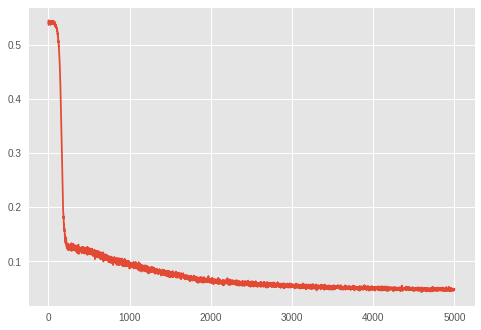

In [112]:
plt.plot(losses)